In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os.path

from rikabtools.plot_utils import cmaps
from labellines import labelLine, labelLines
from tqdm import tqdm


/tmp/ipykernel_19011/4148078680.py:9: RuntimeWarning: overflow encountered in exp
  return term_1 * term_2 * lz * (np.exp(1/lz) - 1) * (np.exp(-2/lz)) * (-np.exp(-3/lz) + 1)
/tmp/ipykernel_19011/4148078680.py:9: RuntimeWarning: invalid value encountered in multiply
  return term_1 * term_2 * lz * (np.exp(1/lz) - 1) * (np.exp(-2/lz)) * (-np.exp(-3/lz) + 1)


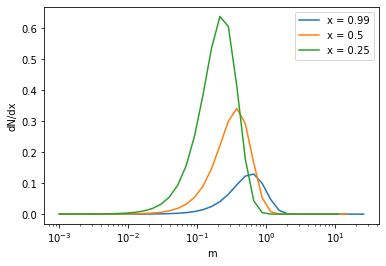

In [2]:
def f(x, m):

    term_1 = 1  / (m**2 *(1-x)/x + x)
    term_2 = 1.0 -x  + x**2/3

    lz = x  / m**2


    return term_1 * term_2 * lz * (np.exp(1/lz) - 1) * (np.exp(-2/lz)) * (-np.exp(-3/lz) + 1)


m = np.logspace(-3, 3)
plt.plot(m, f(0.99, m), label = "x = 0.99")
plt.plot(m, f(0.5, m), label = "x = 0.5")
plt.plot(m, f(0.25, m), label = "x = 0.25")
plt.xlabel("m")
plt.ylabel("dN/dx")
plt.xscale("log")
plt.legend()

/home/rikab/miniconda3/lib/python3.8/site-packages/labellines/core.py:148: UserWarning: Tried to label line Line2D(_child4), but could not find a label for it.
  warnings.warn(


4.006954581040633
33.362296557410886
163.0407320531529
271.59676054006974


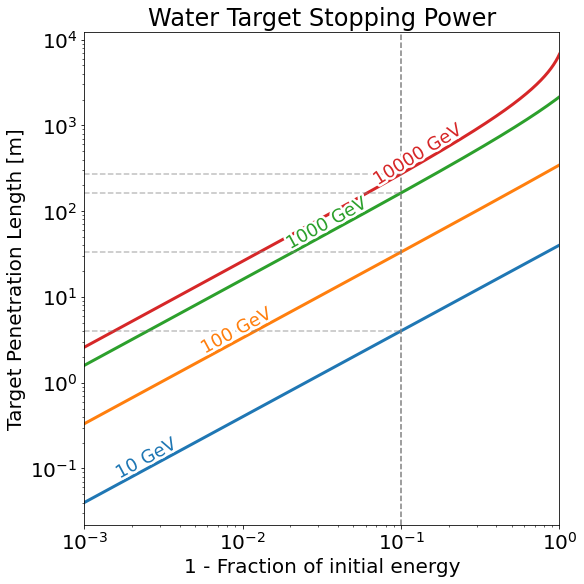

In [3]:
def length(fraction, a, b, E0):
    E = E0 * 1000
    return 0.01* np.log((a + b*E)/(a + fraction*b*E))/ b

plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 8))

x = np.linspace(0,1,1000)

a_10, b_10 = 2.482 , 1.4380e-6 
a_100, b_100 = 2.781 , 2.278e-6 
a_1000, b_1000 = 3.325 , 2.9575e-6 
a_10000, b_10000 = 3.634 , 3.4961e-6 

l10 = length(0.9, a_10, b_10, 10)
l100 = length(0.9, a_100, b_100, 100)
l1000 = length(0.9, a_1000, b_1000, 1000)
l10000 = length(0.9, a_10000, b_10000, 10000)


plt.plot(x, length(1 - x, a_10, b_10, 10), label = "10 GeV", lw = 3)
plt.plot(x, length(1 - x, a_100, b_100, 100), label = "100 GeV", lw = 3)
plt.plot(x, length(1 - x, a_1000, b_1000, 1000), label = "1000 GeV", lw = 3)
plt.plot(x, length(1 - x, a_10000, b_10000, 10000), label = "10000 GeV", lw = 3)

plt.axvline(0.1, color = "grey", ls = "--")
plt.hlines([l10, l100, l1000, l10000], 1e-3, 0.1, color = "grey", alpha = 0.5, ls = "--")

plt.xlabel("1 - Fraction of initial energy")
plt.ylabel("Target Penetration Length [m]")


# plt.legend(title = "Initial Energy", frameon = False)
plt.xscale("log")
plt.yscale("log")
plt.xlim(1e-3, 1)
labelLines(ax.get_lines(), zorder=20, fontsize = 18, va = "bottom", ha="right", xvals=(1e-3, 1))


plt.title("Water Target Stopping Power")

plt.savefig("tex/Figures/Radiation_Lengths/water_lengths.pdf")

print(l10)
print(l100)
print(l1000)
print(l10000)


/home/rikab/miniconda3/lib/python3.8/site-packages/labellines/core.py:148: UserWarning: Tried to label line Line2D(_child4), but could not find a label for it.
  warnings.warn(


0.5316202476255789
2.917051442969329
5.048098992464496
5.057986524782946


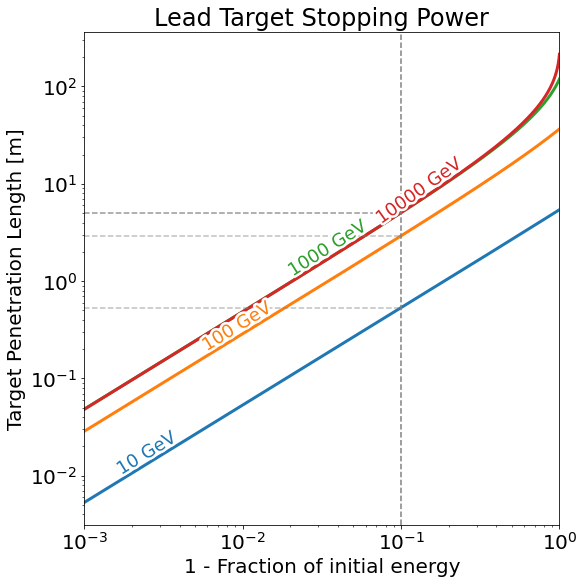

In [4]:
rho = 11.2

def length(fraction, a, b, E0):
    E = E0 * 1000
    return 0.01* np.log((a + b*E)/(a + fraction*b*E))/ b / rho

plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 8))

x = np.linspace(0,1,1000)

a_10, b_10 = 1.615 , 6.7899e-6 
a_100, b_100 = 1.860 , 12.6448e-6 
a_1000, b_1000 = 2.051 , 16.4724e-6 
a_10000, b_10000 = 2.251 , 18.3613e-6 

l10 = length(0.9, a_10, b_10, 10)
l100 = length(0.9, a_100, b_100, 100)
l1000 = length(0.9, a_1000, b_1000, 1000)
l10000 = length(0.9, a_10000, b_10000, 10000)


plt.plot(x, length(1 - x, a_10, b_10, 10), label = "10 GeV", lw = 3)
plt.plot(x, length(1 - x, a_100, b_100, 100), label = "100 GeV", lw = 3)
plt.plot(x, length(1 - x, a_1000, b_1000, 1000), label = "1000 GeV", lw = 3)
plt.plot(x, length(1 - x, a_10000, b_10000, 10000), label = "10000 GeV", lw = 3)

plt.axvline(0.1, color = "grey", ls = "--")
plt.hlines([l10, l100, l1000, l10000], 1e-3, 0.1, color = "grey", alpha = 0.5, ls = "--")

plt.xlabel("1 - Fraction of initial energy")
plt.ylabel("Target Penetration Length [m]")


# plt.legend(title = "Initial Energy", frameon = False)
plt.xscale("log")
plt.yscale("log")
plt.xlim(1e-3, 1)
labelLines(ax.get_lines(), zorder=20, fontsize = 18, va = "bottom", ha="right", xvals=(1e-3, 1))


plt.title("Lead Target Stopping Power")

plt.savefig("tex/Figures/Radiation_Lengths/lead_lengths.pdf")



print(l10)
print(l100)
print(l1000)
print(l10000)


# Experiment Parameters

In [6]:
# ##### CONFIG FILE #####

config = np.load(f"experiments/Lead/cross_sections/config_{5000}.npy", allow_pickle=True)[()]


# ##### PARAMETERS #####
E_0 = config["E_0"]
m_lepton = config["Lepton Mass"]
theta_max = config["theta_max"]
x_max = 1 - m_lepton / E_0

xbins = config["xbins"]
xs = np.linspace(0, 1, xbins)

m_Xs = np.array(config["m_X"])

target_name = config["Target Name"]

# Options
run_IWW = config["IWW"]
run_WW = config["WW"]
cross_section_directory = config["Cross Sections Directory"]
cross_section_file = config["Cross Sections File"]


if run_IWW:
        cross_section_dict = np.load(f"{cross_section_file}.npy", allow_pickle=True)[()]
if run_WW:
        cross_section_dict = np.load(f"{cross_section_file}_WW.npy", allow_pickle=True)[()]

# Constants
m_mu = 0.105
m_e = 0.000511
m_tau = 1.776
m_p = 0.937
alpha_EM = 1.0/137

cases = ["Scalar", "Pseudoscalar", "Vector", "Axial Vector"]
colors = ["red", "yellow", "green", "blue", "magenta"]


# Calculate Lifetimes

Independent of cross sections
Decay length for each particle to decay to SM leptons and hadrons

In [7]:
def scalar_decay_width(m_X, epsilon, m_l):

    prefactor = epsilon**2 * alpha_EM / 2
    kinematic_factor = m_X * np.nan_to_num( np.sqrt(1 - 4 * m_l**2 / m_X**2)**3)
    return prefactor * kinematic_factor


def pseudoscalar_decay_width(m_X, epsilon, m_l):

    prefactor = epsilon**2 * alpha_EM / 2
    kinematic_factor = m_X * np.nan_to_num( np.sqrt(1 - 4 * m_l**2 / m_X**2))
    return prefactor * kinematic_factor



def vector_decay_width(m_X, epsilon, m_l):

    prefactor = epsilon**2 * alpha_EM / 3
    kinematic_factor = m_X * (1 + 2*m_l**2 / m_X**2) * np.nan_to_num( np.sqrt(1 - 4 * m_l**2 / m_X**2))
    return prefactor * kinematic_factor

def axial_vector_decay_width(m_X, epsilon, m_l):

    prefactor = epsilon**2 * alpha_EM / 3
    kinematic_factor = m_X * np.nan_to_num( np.sqrt(1 - 4 * m_l**2 / m_X**2)**3)
    return prefactor * kinematic_factor


decay_widths = [scalar_decay_width, pseudoscalar_decay_width, vector_decay_width, axial_vector_decay_width]



# R-Ratio

Data for $\sigma(\mu\mu \to had)$ / $\sigma(\mu\mu \to ee)$ from PDG (link: )

In [8]:
# Helper function to read PDG Data files
def is_float(string):
    """ True if given string is float else False"""
    try:
        return float(string)
    except ValueError:
        return False

pdg_r = []
with open('rpp_cleaned.dat', 'r') as f:
    d = f.readlines()
    for i in d:
        k = i.rstrip().split(" ")
        if "*" not in k:
            row = []
            for x in k:
                if x != "" and is_float(x):
                    row.append(float(x))
            if len(row) > 6 and is_float(row[0]):
                pdg_r.append(np.array(row[:7])) 

pdg_r = np.array(pdg_r)
def Rpp(m_X_linspace):
    return np.interp(m_X_linspace, pdg_r[:,0], pdg_r[:,3])



# # Plot the R-Ratio
# plt.rcParams.update({'font.size': 20})
# fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 8))

# m_X_linspace = np.linspace(0,100,2500)
# plt.plot(pdg_r[:,0], pdg_r[:,3], color = "black", lw = "3", label = "PDG Exact")
# plt.plot(m_X_linspace, Rpp(m_X_linspace), color = "red", lw = "3", label = "Interpolation")
# plt.xlabel("$m_X$ [GeV]")
# plt.ylabel("$R$-Ratio")
# plt.xscale("log")
# plt.yscale("log")
# plt.title("PDG 2022 R-Ratio")
# plt.legend(frameon = False)


# Decay Lengths

NameError: name 'decay_dictionary' is not defined

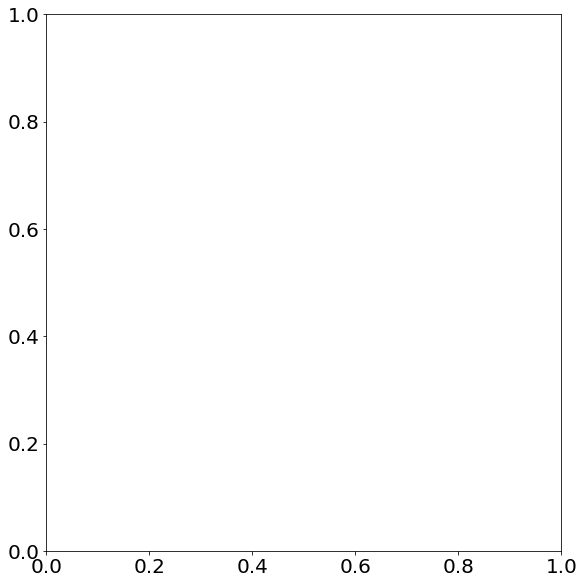

In [9]:



# Return the decay length of a particle with energy fraction x, mass m_X, coupling epsilon, in meters
def decay_length(decay_width, x, m_X, epsilon):

    gamma = (x * E_0) / m_X

    total_decay_width = 0
    for decay in decay_dictionary:
        weight, mass = decay_dictionary[decay]
        if decay == "hadrons":
            weight = Rpp(m_X) * weight
        total_decay_width += weight * decay_width(m_X, epsilon, mass)

    return 1e-15 * hbarc * gamma / total_decay_width



plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 8))


m_X_logspace = np.logspace(-3, 3, 1000)
eps_logspace = np.logspace(-10, -1, 1000)


# Plot for fun
for (c,case) in enumerate(cases):
    decay_lengths = decay_length(decay_widths[c], 1.0, m_X_logspace, 1e-7)
    plt.plot(m_X_logspace, decay_lengths, color = cmaps[colors[c]](0.75), lw = 3, label = case,)


plt.text(0.05, 1.00 - 0.05*1, r"$\epsilon_X = 10^{-7}$", fontsize = 20, transform = plt.gca().transAxes,)
plt.text(0.05, 1.00 - 0.05*2, r"$x = 1$", fontsize = 20, transform = plt.gca().transAxes,)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("$m_X$ [GeV]")
# plt.title(f"{"Vector"} Case: " + r"$\mu+N \to \mu+N+A$")
plt.ylabel(r"Decay length [meters]")

plt.legend(frameon = False)
# labelLines(ax.get_lines(), zorder=2.5, fontsize = 14)



In [18]:
maximum_exponent = 250
dx = 1.0/xbins

# Function to interpolate (in log scale) the cross section between two pre-calculated mass points
def interpolate_cross_section(x, m_X, cross_sections):


    if x > x_max:
        return m_X * 0

    # logarithmic interpolation
    return (x > m_X / E_0) * dx * np.interp(m_X, m_Xs, np.nan_to_num([cross_sections[i][int(x * xbins)-1] for i in range(len(cross_sections))]))


# numpy-vectorized function to approximate log[exp(x)-1] when x is either very large or very small
def approximate_log_exp_minus_1(x, maximum_exponent, sign = 1):

    answer = np.nan_to_num(np.log(sign * (np.exp(x)-1)))

    # if x is large and positive
    large_positive_x_bools = (x > maximum_exponent) * (x > 0)
    answer = x*large_positive_x_bools + answer*(1-large_positive_x_bools)

    # if x is small, but positive
    small_positive_x_bools = (x < 1/maximum_exponent) * (x > 0)
    answer = np.nan_to_num(np.log(x)*small_positive_x_bools) + answer*(1-small_positive_x_bools)

    # if x is large and negative
    large_negative_x_bools = (-1*x > maximum_exponent) * (x < 0)
    answer = -np.exp(x)*large_negative_x_bools + answer*(1-large_negative_x_bools)

    # if x is small and negative
    small_negative_x_bools = (-1*x < 1/maximum_exponent) * (x < 0)
    answer = np.nan_to_num(np.log(-1 * x)*small_negative_x_bools) + answer*(1-small_negative_x_bools)

    return answer


# Calculate (the log of) dN/dx 
def log_normalized_dNdx(N_mu, x, m_X, epsilon, Gamma, cross_sections):
    
    if x > x_max:
        return -99999

    length = decay_length(Gamma, x, m_X, epsilon) * 100 # cm


    term1 = np.nan_to_num(np.log(target_density * length / target_A * hbarc_cm_invGeV2**2))
    term2 = np.nan_to_num(np.log(interpolate_cross_section(x, m_X, cross_sections)))
    

    term3 = np.nan_to_num(approximate_log_exp_minus_1(l_target / length, maximum_exponent, 1))
    term4 = np.nan_to_num(-1 * (l_target + l_shield) / length)


    term5 = np.nan_to_num(approximate_log_exp_minus_1(-1 * l_detector / length, maximum_exponent, -1))



    numerical_check_3 = (length > 0)

    numerical_check = numerical_check_3
    return (numerical_check * (term1 + term2 + term3 + term4 + term5) )


# Calculate the total number of events by integrating (the exponential of) log(dN/dX)
def compute_events(N_mu, m_X, epsilon, width, case):

    events = np.zeros_like(m_X)
    for (i, x) in tqdm(enumerate(xs)):


        length = decay_length(width, x, m_X, epsilon) * 100 # cm
        experiment_lengthscale = l_detector + l_shield + l_target

        # Check to make sure that the decay length is both positive and not too big
        numerical_check_3 = (length > 0) #* (length < maximum_exponent * experiment_lengthscale)

        numerical_check = numerical_check_3
        dNdX = log_normalized_dNdx(N_mu, x, m_X, epsilon, width, cross_section_dict[case])
        events += numerical_check * np.exp(( np.nan_to_num(dNdX)))
    return N_A * N_mu * events 

(0.001, 5000)

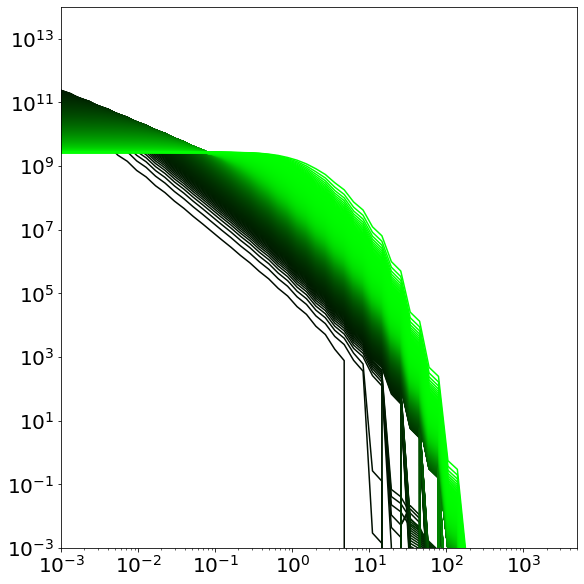

In [21]:
# numerical check (delete this cell later)

temp = np.logspace(-3, 3, 50)

geV2_to_mb = 0.389
mb_to_fb = 1e12


plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 8))

temp2 = interpolate_cross_section(0.0, temp, cross_section_dict["Vector"])
for x in xs[1:]:
    temp2 =  interpolate_cross_section(x, temp, cross_section_dict["Vector"])
    plt.plot(temp, temp2 * geV2_to_mb * mb_to_fb, color = cmaps["green"](np.sqrt(x)))






plt.plot(temp, temp2 * geV2_to_mb * mb_to_fb)
plt.xscale("log")
plt.yscale("log")

plt.ylim([1e-3, 1e14])
plt.xlim([1e-3, E_0])

In [ ]:
N_mu = 1e20
m_X_logspace = np.logspace(-2, 1.2, 250)
epsilon_logspace = np.logspace(-10, -2, 250)

m_X_linspace = np.linspace(-2, 1.2, 250)
epsilon_linspace = np.linspace(-10, -2, 250)

M, E = np.meshgrid(m_X_logspace, epsilon_logspace)
Mlin, Elin = np.meshgrid(m_X_linspace, epsilon_linspace)

if not os.path.isfile(f"experiments/{target_name}/{experiment_name_string}/event_counts.npy"):

    # Calculate everything
    scalar_events = E**2 * compute_events(N_mu, M, E, scalar_decay_width, cases[0])
    psuedoscalar_events = E**2 * compute_events(N_mu, M, E, pseudoscalar_decay_width, cases[1])
    vector_events = E**2 * compute_events(N_mu, M, E, vector_decay_width, cases[2])
    axial_vector_events = E**2 * compute_events(N_mu, M, E, axial_vector_decay_width, cases[3])


    events_dict = {
        "Scalar" : scalar_events,
        "Pseudoscalar" : psuedoscalar_events,
        "Vector" : vector_events,
        "Axial Vector" : axial_vector_events,
    }


    np.save(f"experiments/{target_name}/{experiment_name_string}/event_counts.npy", events_dict)


In [ ]:
colormaps = ["Reds", "YlOrBr", "Greens", "Blues"]

# function to load the event counts dictionary from the default directory
def load_events_dict(target, decay, energy, l_target_, l_shield_, l_detector_):

    experiment_name_string_ = f"experiments/{target}/experiment_{decay}_e{energy}_t{l_target_}_s{l_shield_}_d{l_detector_}"
    print(experiment_name_string_)
    return np.load(f"{experiment_name_string_}/event_counts.npy", allow_pickle=True)[()]


# Function to plot a single contour
def plot_contour(case, c, evs, weight = np.log(5), color = "", color_weight = 1, label = ""):


    white_events = np.log10(evs[case])
    white_events[white_events  < 0 ] = np.NaN
    if color == "":
        color = cmaps[colors[c]](0.99 * color_weight)
    contours = plt.contour(Mlin,Elin, np.log10(evs[case]), levels = [weight,], lw = 3, colors = [color,], label = "5 Events", inline = "True")#, levels = [5], colors = [colors[i]])
    if label == "":
        plt.clabel(contours, inline=True, levels=[weight,])
    else:
        plt.clabel(contours, inline=True, levels=[weight,], fmt = {contours.levels[0] : label})





for (c, case) in enumerate(cases):
    if c < 4:

        plt.rcParams.update({'font.size': 20})
        fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 8))


        # two experiments
        exp1 = load_events_dict("Water", "darkX", 10, 10, 5, 100)
        exp2 = load_events_dict("Water", "darkX", 10, 10, 10, 100)
        exp3 = load_events_dict("Water", "darkX", 10, 10, 20, 100)

        plot_contour(case, c, exp1, label= "5m")
        plot_contour(case, c, exp2, color_weight= 0.5, label= "10m")
        plot_contour(case, c, exp3, color_weight= 0.0, label= "20m")



        plt.xlabel("log$_{10}(m_X/$GeV)")
        plt.ylabel("log$_{10}(\epsilon_X)$")
        plt.title(f"{case} Case: " + r"$\mu+N \to \mu+N+X$")

        if not run_WW:
            plt.text(0.6, 0.99 - 0.05*1, r"Using IWW", fontsize = 20, transform = plt.gca().transAxes)
        else:
            plt.text(0.6, 0.99 - 0.05*1, r"Using WW", fontsize = 20, transform = plt.gca().transAxes)
        plt.text(0.6, 0.99 - 0.05*2, r"$E_0 = %d$ GeV" % E_0, fontsize = 20, transform = plt.gca().transAxes)
        plt.text(0.6, 0.99 - 0.05*3, r"$N_\mu = 10^{20}$", fontsize = 20, transform = plt.gca().transAxes)
        plt.text(0.6, 0.99 - 0.05*4, f"{target_name} Target", fontsize = 20, transform = plt.gca().transAxes)
        plt.legend(frameon = False, loc = "upper left")

        # plt.savefig(f"tex/Figures/exclusions_{case}_{E_0}.pdf", transparent = False)
        plt.savefig(f"{config['Experiment Directory']}/exclusions_{case}.pdf", transparent = False)
        plt.show()

# plt.xscale("log")
# plt.yscale("log")
